### Predicting Youth Risk Behaviors: Modeling the YRBSS

In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline
import seaborn as sns
sns.set_style('whitegrid')

In [15]:
# this one gives sample sizes based on location & grouped pop
alc = pd.read_csv('data/Alcohol and Other Drug Use.csv')

In [19]:
alc.loc[1]

YEAR                                                                                    2017
LocationAbbr                                                                              SA
LocationDesc                                                                   San Diego, CA
DataSource                                                                             YRBSS
Topic                                                             Alcohol and Other Drug Use
Subtopic                                                                         Alcohol Use
ShortQuestionText                                                     Current binge drinking
Greater_Risk_Question                                        Reported current binge drinking
Description                                four or more drinks of alcohol in a row (if th...
Data_Value_Symbol                                                                          %
Data_Value_Type                                                       

In [20]:
# by state

yrbs = pd.read_csv('data/Youth_Risk_Behavioral_Surveillance_System__YRBSS__Data.csv')

In [28]:
yrbs.loc[0]

YEAR                                                  1999
LocationAbbr                                            MA
LocationDesc                                 Massachusetts
TopicType                        Tobacco Use - Survey Data
TopicDesc                            Cigarette Use (Youth)
MeasureDesc                                 Smoking Status
SubMeasure                       Frequent Cigarette Smoker
DataSource                                           YRBSS
Response                                          Frequent
Data_Value_Unit                                          %
Data_Value_Type                                 Percentage
Data_Value                                            20.9
Data_Value_Footnote_Symbol                             NaN
Data_Value_Footnote                                    NaN
Data_Value_Std_Err                                     4.4
Low_Confidence_Limit                                  13.3
High_Confidence_Limit                                 31

In [37]:
yrbs.SubMeasure.unique()

array(['Frequent Cigarette Smoker', 'Current Cigarette Smoker',
       'Current Smokeless Tobacco User', 'Frequent Cigar Smoker',
       'Current Cigar Smoker', 'Frequent Smokeless Tobacco User',
       'Ever Cigarette Smoker', 'Current E-Cigarette User',
       'Ever E-Cigarette User', 'Current Tobacco User',
       'Frequent E-Cigarette User'], dtype=object)

<AxesSubplot:xlabel='YEAR', ylabel='Count'>

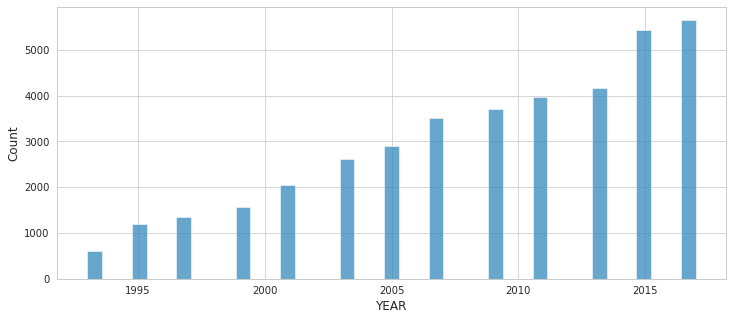

In [23]:
fig, ax = plt.subplots(figsize=(12, 5))
sns.histplot(data = yrbs, x='YEAR')

In [38]:
# Places is only 18 and older...could be interesting to compare to predictions from regional data for youth

places = pd.read_csv('data/PLACES__Local_Data_for_Better_Health__County_Data_2020_release.csv')

In [41]:
places.Measure.unique()

array(['Current lack of health insurance among adults aged 18-64 years',
       'Cancer (excluding skin cancer) among adults aged >=18 years',
       'Current asthma among adults aged >=18 years',
       'Binge drinking among adults aged >=18 years',
       'Obesity among adults aged >=18 years',
       'Arthritis among adults aged >=18 years',
       'Taking medicine for high blood pressure control among adults aged >=18 years with high blood pressure',
       'Coronary heart disease among adults aged >=18 years',
       'Mammography use among women aged 50-74 years',
       'Visits to doctor for routine checkup within the past year among adults aged >=18 years',
       'Stroke among adults aged >=18 years',
       'Chronic obstructive pulmonary disease among adults aged >=18 years',
       'High blood pressure among adults aged >=18 years',
       'Current smoking among adults aged >=18 years',
       'Cervical cancer screening among adult women aged 21-65 years',
       'All teeth l

In [42]:
nsch = pd.read_sas('data/nsch_2019_screener.sas7bdat')

In [46]:
nsch.head()

,FIPSST,STRATUM,TOTKIDS_R,TENURE,HHLANGUAGE,YEAR,CBSAFP_YN,METRO_YN,MPC_YN,TENURE_IF,...,C_K2Q16,C_K2Q17,C_K2Q18,C_K2Q19,C_K2Q20,C_K2Q21,C_K2Q22,C_K2Q23,C_CSHCN,C_FWS
0,b'12',b'1',2.0,1.0,1.0,2019.0,NaN,1.0,2.0,0.0,...,2.0,NaN,NaN,2.0,NaN,NaN,2.0,NaN,2.0,3424.828387
1,b'12',b'1',2.0,1.0,1.0,2019.0,NaN,1.0,2.0,0.0,...,2.0,NaN,NaN,2.0,NaN,NaN,2.0,NaN,2.0,3424.828387
2,b'05',b'2A',2.0,1.0,1.0,2019.0,1.0,1.0,1.0,0.0,...,2.0,NaN,NaN,2.0,NaN,NaN,2.0,NaN,2.0,947.229736
3,b'05',b'2A',2.0,1.0,1.0,2019.0,1.0,1.0,1.0,0.0,...,2.0,NaN,NaN,2.0,NaN,NaN,2.0,NaN,2.0,949.255374
4,b'54',b'1',2.0,2.0,1.0,2019.0,NaN,NaN,NaN,0.0,...,2.0,NaN,NaN,2.0,NaN,NaN,2.0,NaN,1.0,198.119753


In [60]:
dash_ms = pd.read_csv('data/DASH_-_Youth_Risk_Behavior_Surveillance_System__YRBSS___Middle_School.csv')

In [62]:
dash_ms.YEAR.unique()

array([2011, 1995, 2001, 2007, 1999, 2005, 2017, 2013, 2015, 2009, 2003,
       1997])

In [65]:
len(dash_ms[dash_ms['LocationDesc']=='Colorado'])

7200

In [63]:
dash_ms_co = dash_ms[dash_ms['LocationDesc']=='Colorado']

In [64]:
dash_ms_co.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7200 entries, 9 to 750815
Data columns (total 35 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   YEAR                                     7200 non-null   int64  
 1   LocationAbbr                             7200 non-null   object 
 2   LocationDesc                             7200 non-null   object 
 3   DataSource                               7200 non-null   object 
 4   Topic                                    7200 non-null   object 
 5   Subtopic                                 7200 non-null   object 
 6   ShortQuestionText                        7200 non-null   object 
 7   Greater_Risk_Question                    7200 non-null   object 
 8   Description                              5280 non-null   object 
 9   Data_Value_Symbol                        7200 non-null   object 
 10  Data_Value_Type                          7200 

In [55]:
dash_ms_co.Greater_Risk_Data_Valueinfo()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7200 entries, 9 to 750815
Data columns (total 35 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   YEAR                                     7200 non-null   int64  
 1   LocationAbbr                             7200 non-null   object 
 2   LocationDesc                             7200 non-null   object 
 3   DataSource                               7200 non-null   object 
 4   Topic                                    7200 non-null   object 
 5   Subtopic                                 7200 non-null   object 
 6   ShortQuestionText                        7200 non-null   object 
 7   Greater_Risk_Question                    7200 non-null   object 
 8   Description                              5280 non-null   object 
 9   Data_Value_Symbol                        7200 non-null   object 
 10  Data_Value_Type                          7200 